![UVic logo](https://res-2.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1406151713/wptak6xuezyh36b1hbty.png)

# **ECE 471/536 Spring 2021: Computer Vision**
## Assignment 3: Visual Features Extraction and Classification 
### Due date: March 16, 10:00 PM PST


> Student: Nolan Caissie, V00878989
---
Abstract: *This assignment provides students with the opportunity to work with the various steps of a machine learning-based image classification pipeline: dataset curation and division, visual features extraction, classification, performance evaluation and fine-tuning.*
 

## **1. Instructions:** follow the intructions provided on a sequential manner. 
### 1.0 **Identification** 
Please enter your name and V number on the text cell above.

### 1.1 **Submission package**
Your final submission package must be submitted using the [BrightSpace](https://https://bright.uvic.ca/d2l/home)  platform. You will find this assignment's specific page under **Course Tools > Assignments**. Your submission package consists of a *.zip* file containing:

1.   *.ipynb* file: your modified version of this Google Colab template. Place your complete assignment solution/information in this version. 

### 1.2 **Coding considerations**
* In previous years we asked students to complete assignments offline by installing either MATLAB or a Python environment in their computers. In order to standardize the submissions and guarantee that everyone has access to the same Python environment, all assignments are going to be described (by us) and completed (by you) using the same Google Colab template script.
* Google Colab offers a Python environment that can be accessed in your browser and executed using Google Cloud, so no local installation is necessary. It makes the setting-up process significantly easier! Please read [this quick tutorial](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb) notebook on Google Colab/Python.

### 1.3 **Creating your Google Colab submission file**

* Modify this template with your solutions to the assignment. You will find "**TO-DO**" indicators throughout the assingment highlighting portions of the code you are asked to complete, as well as their worth. 
* Colab notebooks are divided into individual cells. You can execute the code inside of a given cell by pressing **CTRL+ENTER**, or that of all cells by pressing **CTRL+F9**. Variables must be "executed" in a cell before being used by subsequent ones (the same goes for libraries imported). Note that some cells of this assignment contain flags that must by changed (and executed) before you move forward.
* If you completed the whole assignment, make sure that simply pressing "**CTRL+F9**" executes all cells correctly. **This is going to be the first marking step we will execute when evaluating your submission**.  

### 1.4 **Use of open source code**

* The use of small segments of freely-available code is permitted. However, it is **extremely important** that you indicate in your in-code comments where these are used, as well as their sources. Failure to do so can be considered plagiarism, which is a serious offence. Learn more about detection mechanisms and consequences of plagiarism at UVic [here](https://www.uvic.ca/library/research/citation/plagiarism/). Note that the programming assignments are designed so that most of their content should be created by you.     
* A number of functions/algorithms are already implemented by libraries we will use (e.g., [OpenCV](https://opencv.org/), [scikit-learn](https://scikit-learn.org/stable/)), however you should not use them unless otherwise instructed to do so. Mannualy coding some of these function is an important part of the learning process. 


In [ ]:
READ_THE_INSTRUCTIONS_FLAG = True

# **2. Programming: Dataloading, feature extraction, model training and evaluation for image classification**

### **2.1 Dataloading: reading, shuffling and pre-processing the data**

Different datasets need to be handled distinctly. Often you will need to code your custom dataloader to correctly retrieve the data and its labels following a given format. Although a number of libraries offer easier ways to load data (e.g., [sklearn](https://scikit-learn.org/0.16/datasets/index.html), [torchvision](https://pytorch.org/vision/0.8/datasets.html)), we are going to code a custom dataloading scheme based on a simple dataset of images from three classes. This pseudo-dataloder is going to read sub-folders from a root directory and create data and labels structures based on them. Our dataloading process is also going to involve the **shuffling** of the training and testing sets.  

The **train** and **test** subsets (folders) are already provided. Note that one would typically load a complete, unified dataset and randomly partition it into training, validation and testing subsets. In fact, distinct splits of a single dataset into different subsets are the basis of **cross-fold validation**. The **validation** subset helps evaluating the performance of the system while the training process takes place without influencing in its parameter's values (as the samples in the training subset are supposed to do via backpropagation). We are going to create and work with a validation subset only in the next assignment, resorting to only train and test sets on the current one.   

In [ ]:
from matplotlib import pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from sklearn.utils import shuffle
from google.colab import files
import sys
import cv2
import os
import numpy as np

print('-'*40)
print ('Python version: {}'.format(sys.version))
print('OpenCV version: {}'.format(cv2.__version__))

if not READ_THE_INSTRUCTIONS_FLAG:
  raise Exception('Please go back and read the instructions.')
else:
  print('\nThank you for reading the instructions.')
print('-'*40)

----------------------------------------
Python version: 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
OpenCV version: 4.1.2

Thank you for reading the instructions.
----------------------------------------


In [ ]:
# The activities described in this cell are worth a maximum of 10 points. 

# TO-DO: create the function "read_data", which reads all .jpg images from the subfolders of a given 
# path (i.e., root folder). Follow the template provided. 

def read_data(address, resize_dim = (64,64)): # the default resizing dimensions are 64 x 64 pixels

    # This function reads all images from a folder (whose address is given by input "address")
    # and its subfolders, and creates labels based on the subfolder names. Consider the 
    # following illustrative directory structure from a root folder called "train" or "test"
    # with subfolders named "class1" and "class2" (two classes):
    
    ####must take the address parameter and read the images from folder/subfolders, creating labels based on the subfolder names
    #below is an example of directory structure

    # +-- train
    #     +-- class1
    #     +-- class2
    # +-- test
    #     +-- class1
    #     +-- class2
    #

  # In this example, we want the function to, given the path to "train" (or "test"),
  # visit sub-folders "class1" and "class2" and store all of their images into a single ndarray.
  # While doing that, the function must also create a "labels" ndarray specifying the  
  # class each sample belongs to. 


  # 0. Grab folders/sub-folders addresses and number of classes (i.e., # of subfolders)
  # tip: use os.walk

  #Here, we create a list called "folders" which holds the path structure of the 
  #folders and the subfolders. We also create a list called "subfolderNames" which
  #has the root directory name in position 0 of the list and the remaining list
  #positions will contain the names of the subfolders  
  folders = [] # TO-DO # structure with folders and subfolders
  subfolderNames = [] #TO-DO # subfolders names. index [0] is the root directory.
  n_classes = 0 # TO-DO # number of subfolder = number of classes.
  #put the root directory path in index [0]
  subfolderNames.append(address)
  
  #walk the directory tree
  for (root, dirs, files) in os.walk(address, topdown=True):
    #grap the folders/sub-folders paths and append them into an array
    #join the root path name with all subdirectory path names and store
    #in the folder array - also save the subfolder names in the subfolderNames array
    #for each "name" in dirs - i.e. for each subdirectory in the tree add 1 to n_classes
    for name in dirs:
      folders.append(os.path.join(root, name)) 
      subfolderNames.append(name)
      n_classes += 1 
 
  #print the folders and subfolderNames lists to check if results are correct
  #also print the number of classes
  print('-'*100)
  print("The content of the 'folders' array, is as follows: {}\n".format(folders))
  print("The content of the 'subfolderNames' array, is as follows: {}\n".format(subfolderNames))
  print("Thus, the number of classes are: {}".format(n_classes))
  print('-'*100)

  # 1. Create empty lists named "data" and "labels". Create an empty dictionary named
  # "classes_labels". 
  # Dictionaries are convenient data structures offered in Python to create
  # key-value pairs. The "classes_labels" dictionary will specify the index-to-class
  # correspondence. E.g., classes_labels['0'] = "beaver", classes_labels['1'] = "moose", etc. 
  data = [] # TO-DO
  labels = [] # TO-DO
  classes_labels = {} # TO-DO (create an initially EMPTY dictionary)

  # 2. Create a loop that does the following: 
  #   2.1. Visits each sub-folder of the path provided and,
  #   2.2. For each new subfolder, creates a key/value pair in the "classes_labels"
  #     dictionary (see example above).
  #   2.3  Reads an individual .jpg image file using the cv2 library.
  #   2.4  Resizes the image using the dimensions specified by the "resize_dim"
  #     input. 
  #   2.3. Adds each resized image to an individual index of the "data" list
  #     (all images are added to the same "data" list)
  #   2.4. For each new file read, add the corresponding label to the "labels"
  #     list. E.g., consider two data folders (two classes) with 5 and 10 samples,
  #     respectively. The "labels" list would have the following values (in each position): 
  #     000001111111111
 
  for i in range(n_classes): # for each subfolder,
    #TO-DO # create an # entry in the dictionary for the new class.
    #THIS LINE OF CODE GIVES {0: 'moose', 1: 'beaver', 2: 'srkw'}
    #classes_labels[i] = subfolderNames[i+1]
    #ALTERNATIVE way to assign a number (value) to a key (class name)
    ####THIS ALTERNATIVE LINE OF CODE GIVES  {'moose': 0, 'beaver': 1, 'srkw': 2}
    classes_labels[subfolderNames[i+1]] = i 
    
    # for each image in a subfolder:
            
      # add a label for this class in the labels list
      # read the image
      # resize the image and change BGR to RGB (for matplotlib plotting purposes)
      # add this image to the "data" list
   
    #use os.scandir (which returns an iterator corresponding to the entries in the directory)
    #then for each entry in the directory, check if it is a file (i.e. an image) and then append the
    #image names into the "ent" array
    ent = []
    with os.scandir(folders[i]) as entries:
      print('\nThe files contained within the "{}" dataset of class "{}" are as follows:\n'.format(folders[i],subfolderNames[i+1]))
      for entry in entries:
        if entry.is_file():
          print(entry.name)
          ent.append(entry.name)
    #now, since all the filenames are stored in the ent array, let's iterate through all of the images, joining their names (which)
    #are stored in the ent array, with the folder path in order to read them using opencv (cv2) -
    #we will also use cv2 to resize the images - we will also convert the BGR image to RGB using cv2 
    print("\nThe files we will now read into the 'data' list from folder '{}' of class '{}' using openCV are as follows:\n".format(folders[i], subfolderNames[i+1]))
    for filename in ent:
      img = cv2.imread(os.path.join(folders[i],filename))
      img_rz = cv2.resize(img, resize_dim, interpolation = cv2.INTER_CUBIC)
      img_rz_rgb = cv2.cvtColor(img_rz, cv2.COLOR_BGR2RGB)
      #add all of the images to the data array/list (this includes images from all classes since iterating through each subdirectory one at a time)
      data.append(img_rz_rgb)
      #since iterating through each subdirectory and reading in the images one at a time, we will just append the class value (which is i - the iterable for the "parent loop")
      labels.append(i)
      print(os.path.join(folders[i], filename))
    print('-'*100)

  #print(classes_labels.get("moose"))
  #print(classes_labels.get(0))
  print("The 'classes_labels' dictionary contains the following: {}\n".format(classes_labels)) 
  #print(data)
  print("The 'labels' list contains the following: {}\n".format(labels))

  # 3. Convert the "data" and "labels" lists into numpy ndarrays.
  data = np.array(data) # TO-DO # convert data into NxHxWxC, where N = # of samples, H=height, W=width, C = color channels
  labels = np.array(labels) # TO-DO # convert labels list into np ndarray

  # 4. Return the "data" and "labels" ndarrays, as well as the "classes_labels" dictionary.
  return data, labels, classes_labels 


In [ ]:
# The activities described in this cell are worth a maximum of 5 points.

# TO-DO: check if the "./data/train" or "./data/test" folders already exist in your 
# colab repository. If they don't, ask the user to upload a file called "data.zip"
# and unzip it. This file posses the aforementioned folders.
# note: use the "data.zip" file provided in your assignment description. It has 
# ~35MB. Allow some minutes for it to be uploaded to your colab repository. If
# the colab session is disconnected, you will need to upload the .zip file again.

# TO-DO: check if "./data/train" and "./data/test" exist. If not, ask user to upload 
# "data.zip" and unzip it. This file will have the aforementioned sub-folders.

train_folders = "./data/train/"
test_folders = "./data/test/"
resize_dims = (64,64) # determines the target resizing dimensions.

if not (os.path.exists(train_folders) & os.path.exists(test_folders)):
  if (os.path.exists("./data.zip")):
    print('\n It looks like "data.zip" has been uploaded but not extacted yet. Extracting now...\n')
    !unzip data.zip
  else:
    raise Exception('There are no train and test data sets (or folders). Please upload "data.zip" and run this code cell again')


# TO-DO: use your "read_data" function to read the train and test folders/files. You might 
# need to call this function twice (once for the train folder, once for the test folder).   
train_data, train_labels, classes_labels = read_data(train_folders)# TO-DO
test_data, test_labels, classes_labels_test = read_data(test_folders)# TO-DO 

# assertion to guarantee that the train and test classes are the same based on the subfolders' names.
assert classes_labels==classes_labels_test, 'Your train/test folder names do not match'

# TO-DO: print thte shape of the train and test ndarrays. If correctly loaded, the dimensions 
# of the two data lists should be (253, 64, 64, 3) for train, and (54, 64, 64, 3) for test. 
print('-'*100)
print('-'*100)
print('-'*100)
print("The shape of the 'train_data' ndarray is: {}\n".format(train_data.shape))
print("The shape of the 'test_data' ndarray is: {}".format(test_data.shape))
print('-'*100)
print('-'*100)
print('-'*100)
#print(classes_labels_test[0])
#plt.imshow(train_data[0])

----------------------------------------------------------------------------------------------------
The content of the 'folders' array, is as follows: ['./data/train/moose', './data/train/srkw', './data/train/beaver']

The content of the 'subfolderNames' array, is as follows: ['./data/train/', 'moose', 'srkw', 'beaver']

Thus, the number of classes are: 3
----------------------------------------------------------------------------------------------------

The files contained within the "./data/train/moose" dataset of class "moose" are as follows:

24.jpg
23.jpg
25.jpg
19.jpg
65.jpg
52.jpg
41.jpg
62.jpg
34.jpg
33.jpg
57.jpg
15.jpg
46.jpg
64.jpg
27.jpg
29.jpg
61.jpg
20.jpg
13.jpg
18.jpg
31.jpg
60.jpg
36.jpg
14.jpg
50.jpg
58.jpg
47.jpg
16.jpg
55.jpg
8.jpg
59.jpg
12.jpg
11.jpg
4.jpg
54.jpg
44.jpg
37.jpg
19cli-moose-videoSixteenByNineJumbo1600-v2.jpg
1.jpg
28.jpg
42.jpg
22.jpg
21.jpg
26.jpg
40.jpg
7.jpg
56.jpg
43.jpg
10.jpg
38.jpg
45.jpg
32.jpg
17.jpg
9.jpg
0.jpg
2.jpg
48.jpg
63.jpg
49.jpg


Shuffling train data


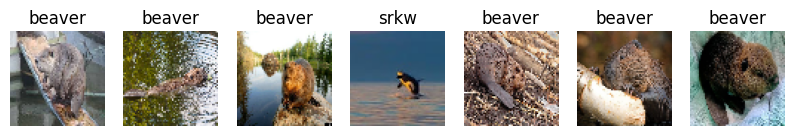


Shuffling test data


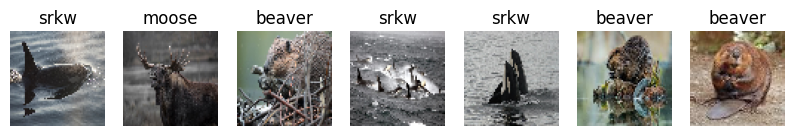

The shape of the shuffled Train data is: (254, 64, 64, 3)

The shape of the shuffled Test data is: (54, 64, 64, 3)



In [ ]:
# The activities described in this cell are worth a maximum of 10 points.

# TO-DO: create the function "randomize_and_display", which randomizes the train or test datasets,
# and display some samples with their associated labels to check its results. Follow the template provided. 

def randomize_and_display(data, labels, classes_labels, display_n=5, phase=None):

  # data: dataset (e.g., test or train data lists)
  # labels: list of labels for your dataset
  # classes: dictionary that specifies the correspondence of classes and labels
    # (see the template of function "read_data" for details)
  # display_n: number of randomized samples to display (default: 5)
  # phase: either train or test (for debugging purposes)
  
    # 0. Print the type of data being shuffled (either "train" or "test").
    if phase is not None:
      print("\nShuffling {} data".format(phase))

    # 1. shuffle both the data and its equivalent labels in the same way  
    # (So that the label/data correspondence is maintained).
    # if using a shuffling algorithmn, use "10" as a seed (for consistency of
    # results). tip: sklearn's "shuffle" function. 
    data_shuff, labels_shuff = shuffle(data, labels, random_state=10)# TO-DO
        
    # 2. create a plot showing the first "display_n" number of images from the shuffled
    # train or test sets. The title of each image should display its corresponding
    # label (using the "labels" and "classes_labels" inputs). You should see samples
    # of all three classes even if choosing a relatively small subset (e.g., display_n>=4). 
    # Hide the axis of the plot for visibility. An example of how your 
    # plot should look like after calling the function twice (once for train, once for test data) is provided at:
    # https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A3/shuffled_data.jpg  

    fig = plt.figure(figsize=(10, 7), dpi=100) #TO-DO # create the figure element
    rows = 1
    columns = display_n
    for i in range(display_n): 
      # add an image to the figure element to be displayed
      fig.add_subplot(rows, columns, i+1)
      img_shuff = data_shuff[i]
      plt.imshow(img_shuff)
      plt.axis('off')
      # with the correct title on top of it (see example above)
      #plt.title(classes_labels.get(labels[i]))
      plt.title(list(classes_labels.keys())[list(classes_labels.values()).index(labels_shuff[i])])
      



    # 3. return the shuffled data and labels
    return data_shuff, labels_shuff

# TO-DO: use your "randomize_and_display" function to shuffle your train and test subsets, as
# well as their corresponding labels.
# Note: a "display_n" number of images should be displayed to guarantee that the shuffling was correctly completed.
# Again, an example of how your plots should look like after calling the function twice is provided at:
# https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A3/shuffled_data.jpg

train_data, train_labels = randomize_and_display(train_data, train_labels, classes_labels, display_n=7, phase='train') # TO-DO # use randomize_and_display on the train data
plt.show()
test_data, test_labels = randomize_and_display(test_data, test_labels, classes_labels_test, display_n=7, phase='test')# TO-DO # use randomize_and_display on the test data
plt.show()
print('The shape of the shuffled Train data is: {}\n'.format(train_data.shape))
print('The shape of the shuffled Test data is: {}\n'.format(test_data.shape))

### **2.2 Feature extraction: HOG, Hue Histogram and Raw RGB**

Now that your train and test data are correctly loaded and pre-processed, you need to extract meaningful visual features from them. These features are going to drive machine lenarning-based image classifications tasks. Since such classifiers are trained and tested based on the features extracted, their design and quality (i.e., how well they represent/generalize the data) are paramount in the performance of the system.

In this assignment we are going to work with three generic features (i.e., not specific to a certain target class) and analyze the classification performance based solely on each of them. Note that recent deep learning-based approaches also calculate similar features, but mostly using convolutional kernels in an efficient [1] manner.

[1] Krizhevsky A, Sutskever I, Hinton GE. Imagenet classification with deep convolutional neural networks. Communications of the ACM. 2017 May 24;60(6):84-90.

In [ ]:
# The activities described in this cell are worth a maximum of 10 points.

# 2.2.1. Histogram of Oriented Gradients

# TO-DO (x points): create a function ("my_hog_batch") that receives an N x H x W x C numpy ndarray 
# of data and calculates, for each image, a row vector representing its HOG. 
# The final output matrix represents the HOG features of all images in the input dataset
# put together (i.e., a row—HOG—per image).

#So, sounds like we are to create a matrix of hogs for which each row is the hog of an image
#i.e. the number of rows would equal the number of images in the data set
def my_hog_batch(data, phase = None):
  
  # 0. Grab the features of a single sample to determine the shape of the HOG row vector
  # You do not need to implement the HOG algorithm again. A tip is to use skimage's "hog" function.
  # use the following parameters: 9-bin HOGs, cells of 8 x 8 pixels, blocks of 3 x 3 cells. 

  template = hog(data[0], orientations=9, pixels_per_cell=(8, 8), visualize=False, cells_per_block=(3,3), block_norm='L2')# TO-DO # Calculates the HOG features of a single sample
  hog_size = template.size # TO-DO # Grabs the dimensions of the template just calculated
  #print(template)
  #print(hog_size)
  # 1. Print what type of data is being processed (for debugging purposes)
  if phase is not None:
      print("Extracting HOG features from the {} dataset...".format(phase))
  else:
      print("Extracting HOG features...")

  # 2. Pre-allocate with zeros a numpy ndarray of dimensions N (samples) x hog_size to receive the HOG features
  hog_features = np.zeros((data.shape[0], hog_size)) # TO-DO # pre-allocate with zeros

  # 3. loop through each sample in the dataset
  
  for i in range (data.shape[0]):
    
    # 4. grab a single sample and turn it to grayscale
    current = cv2.cvtColor(data[i], cv2.COLOR_RGB2GRAY) # TO-DO 
    #plt.imshow(current, cmap='gray')
      
    # 5. calculate the HOG features for the grayscale sample. Again, use the following parameters:
    # orientation bins: 9, cell size: 8x8 pixels, blocks: 3x3 cells
    # Each row of your "hog_features" is going to hold the flattened (i.e., row vector) 
    # output of this function. 
    # tip: use skimage's "hog" function
    current_hog = hog(current, orientations=9, pixels_per_cell=(8, 8), visualize=False, cells_per_block=(3,3), block_norm='L2')
    #print(current_hog)
    # TO-DO: update the value of "hog_features" with a new row (i.e., HOG of a new image)    
    hog_features[i] = current_hog  
    
  print(hog_features.shape)
      
  
  return hog_features

# TO-DO: use the "my_hog_batch" function to extract the HOG features from both 
# train and test datasets.
# Save your HOG train and test features in a dictionary named
# "features" under keys "HOG_train" and "HOG_test".
HOG_test = my_hog_batch(test_data, phase='test')
HOG_train = my_hog_batch(train_data, phase='train')

features = {}
#TO-DO: create the "HOG_train" and "HOG_test" keys and add the output of your 
# "my_hog_batch" function to them. 
#THIS LINE OF CODE GIVES {0: 'moose', 1: 'beaver', 2: 'srkw'}
#classes_labels[i] = subfolderNames[i+1]
#ALTERNATIVE way to assign a number (value) to a key (class name)
####THIS ALTERNATIVE LINE OF CODE GIVES  {'moose': 0, 'beaver': 1, 'srkw': 2}
#classes_labels[subfolderNames[i+1]] = i 
#print(classes_labels.get("moose"))
#print(classes_labels.get(0))
features['HOG_test'] = HOG_test
features['HOG_train'] = HOG_train

print("The shape of the dictionary entry for 'HOG_test' is: {}".format(features.get('HOG_test').shape))
print("The shape of the dictionary entry for 'HOG_train' is: {}".format(features.get('HOG_train').shape))

# assertions to make sure that the dimensions of your HOG features matrices are correct
assert (features['HOG_test'].shape[0]==test_data.shape[0]) and (features['HOG_train'].shape[0]==train_data.shape[0]), 'Dimensions of HOG features matrix wrong.'

Extracting HOG features from the test dataset...
(54, 2916)
Extracting HOG features from the train dataset...
(254, 2916)
The shape of the dictionary entry for 'HOG_test' is: (54, 2916)
The shape of the dictionary entry for 'HOG_train' is: (254, 2916)


In [ ]:
# The activities described in this cell are worth a maximum of 5 points.

# 2.2.2. Hue Histogram 

# TO-DO (x points): create a function that receives an N x H x W x C numpy ndarray 
# of data and calculates, for each image, a row vector representing a histogram of 
# hue values. 
# The final output matrix represents, in each row, the hue histogram of one single
# image from the input dataset.

def my_hhist_batch(input, n_bins, phase = None):   
  
  # 0. Print what type of data is being processed (for debugging purposes).
  if phase is not None:
      print("Extracting h histogram features from the {} dataset...".format(phase))
  else:
      print("Extracting h histogram...")

  # 1. pre-allocate two matrices: 
  # 1) the matrix of HSV images to be converted from the input data matrix; 
  # 2) the matrix of histograms to be calculated from the hue channel of each image
  #print(input.shape[0])
  hsv = np.zeros((input.shape[1],input.shape[2]))# TO-DO # pre-allocate with zeros
  h_hist = np.zeros((input.shape[0], n_bins)) # TO-DO # pre-allocate with histograms with 
  print(h_hist.shape)
  #print(input.shape)
  # zeros (use n_bins to determine the number of bins of these histograms). 
  # recall: one histogram per image

  # 2. loop through each sample in the dataset
  for i in range(input.shape[0]):

      # 3. Convert the current RGB image to HSV
      current = cv2.cvtColor(input[i], cv2.COLOR_RGB2HSV)#TO-DO
      #plt.imshow(current)
      #print(current.shape)
      h, s, v = cv2.split(current)
      #print(h.shape)

      # 4. Calculate the Hue histogram of the HSV version of the current image and 
      # save it as a row of your "h_hist" matrix (i.e., consider only the first 
      # channel of the HSV image). Limit the histogram to the [0,1] range. 
      # The number of bins is determined by the "n_bins" input hyper parameter. 
      # Note: you only need to store the values of each bin (rather than the 
      # values and bin edges). For example: for 10-bin histograms, each HSV image will 
      # result in a 1x10 row vector output.  
      # tip: you can use numpy's histogram-calculating function.
      
      #so we are creating a histogram of the Hue, which is the first channel of HSV 
      #(HSV stands for, hue, saturation, intensity (value))

      #TO-DO: update the value of h_hist
      #h_hist0 = np.histogram(current[:,:,0], bins=n_bins)
      
      ####This numpy histogram is returning 2 arrays, one of them is the bin lables
      ####i.e. if the highest value is 178 then one of the arrays returned will be
      ####an array of 17 numbers from 0 to 178 in steps of 11.125 for a 16 bin histogram
      h_hist_0 = np.histogram(h, bins=n_bins)
      #print(h_hist_0)
      ####So now here, in order to normalize the histogram values from 0-1 we must divide each histogram
      ####by its maximum value (and we are taking just the first array - the one with the values, not the
      ####bin labels - from the numpy histogram function)
      h_hist_1 = h_hist_0[0]/h_hist_0[0].max()
      h_hist[i] = h_hist_1
      #print(h_hist1)
      #print(h_hist)
      #print(hist)
      #hist[i] = hist
      #plt.hist(h_hist)
      #plt.show()

  # return the output matrix
  return h_hist

# TO-DO: use your "my_hhist_batch" function to extract the Hue Histogram features
# from both train and test datasets. Create 16-bin histograms. 
# these features should be saved on your "features" dictionary under keys 
# "HHist_train" and "HHist_test"
n_bins = 16 
hue_Hist_test = my_hhist_batch(test_data, n_bins, phase='test')
hue_Hist_train = my_hhist_batch(train_data, n_bins, phase='train')
#TO-DO: create the "HHist_train" and "HHist_test" keys and add the output of your 
# "my_hhist_batch" function to them. 
features['HHist_test'] = hue_Hist_test
features['HHist_train'] = hue_Hist_train


# assertions to make sure that the dimensions of your features are correct
assert (features['HHist_train'].shape[0]==train_data.shape[0]) and (features['HHist_test'].shape[0]==test_data.shape[0]), 'Dimensions of HHist features matrix wrong.'
assert (features['HHist_train'].shape[1]==features['HHist_test'].shape[1]==n_bins), 'Dimensions of HHist features matrix wrong.'

Extracting h histogram features from the test dataset...
(54, 16)
Extracting h histogram features from the train dataset...
(254, 16)


In [ ]:
# The activities described in this cell are worth a maximum of 5 points.

# 2.2.3. Raw RGB features 

# TO-DO (x points): as a last set of visual features, simply flatten (i.e., turn into a 
# row vector) all pixel intensities found on the images of the datasets.
# each image is going to be presented as a single row in this feature matrix.
# Cast the intensity values as floats for further manipulations. 
# tip: for N color images of dimensions H x W, your raw RGB values 
# matrix should be of dimensions N,(HxWx3)
# these raw features should be saved on your "features" dictionary under keys 
# "raw_train" and "raw_test"

#got some help from https://stackoverflow.com/questions/36967920/numpy-flatten-rgb-image-array

raw_train = train_data.flatten().reshape(train_data.shape[0], train_data.shape[1]*train_data.shape[2]*train_data.shape[3])
raw_test = test_data.flatten().reshape(test_data.shape[0], test_data.shape[1]*test_data.shape[2]*test_data.shape[3])
#cast the intensity values as floats for further manipulations and then place into the features dictionary
#print(type(raw_train[0,1]))
features['raw_train'] = raw_train.astype(float)
features['raw_test'] = raw_test.astype(float)
print("The shape of the 'raw_train' visual features is: {}".format(raw_train.shape))
print("The shape of the 'raw_test' visual features is: {}".format(raw_test.shape))
print("\nThe intensity values in the 'raw_train' feature set have been cast as type: {}".format(type(features['raw_train'][0,0])))
print("The intensity values in the 'raw_test' feature set have been cast as type: {}".format(type(features['raw_test'][0,0])))
# assertion to make sure that the dimensions of one of the matrices are correct
assert(features['raw_train'].shape[1]==(train_data.shape[1]*train_data.shape[2]*train_data.shape[3])),'Wrong RGB raw values matrix dimensions'

The shape of the 'raw_train' visual features is: (254, 12288)
The shape of the 'raw_test' visual features is: (54, 12288)

The intensity values in the 'raw_train' feature set have been cast as type: <class 'numpy.float64'>
The intensity values in the 'raw_test' feature set have been cast as type: <class 'numpy.float64'>


### **2.3 Creating and training the classifiers**

We are going to test the efficacy of three classifiers using our feature matrices: 
- Support Vector Machine (SVM)
- Logistic Regresion (also know as maximum-entropy classification, log-linear classifier)
- Gaussian Naive Bayes
 
Easy-to-use implementation of these models are made available by the scikit-learn module. 

Note that we are working with a **classification** task: the independent variables (i.e., features) are going to determine the probability that a discrete value (class) happens. In the end, the dependent variable (output) can only assume a fixed number of values—the classes of the training data (for our datasets of three classes: SRKW, beaver and moose, "3"). Another common machine learning-based task is **regression**, where the independent variables result in a *continuous* value for the dependent variable (output). A common supervised machine learning algorithm used in such cases is the **linear regression**, where a line is fit to the data to map the values from the features to the predicted, continuous output. 

In [ ]:
# The activities described in this cell are worth a maximum of 15 points.

# TO-DO: import the necessary modules from sklearn to create the three
# models (svm, naive bayes and linear regression).

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


# TO-DO: create a function ("my_model_trainer") that receives a feature vector
# and corresponding labels, trains and returns a model specified by the user.
# Follow the template provided. 

def my_model_trainer(features, labels, model='nb'):

  # features: matrix of features previously calculated
  # labels: labels of the data
  # model: model to be created. must be have of three possible values:
  # "gauss_nb" (default), "lreg" or "svm" 
  
  # 1. Based on the user choice ("model"), create one of 
  # Gaussian Naive Bayes, Logistic Regression or Support Vector
  # Machine models. 

  # Note: for SVM, use "svm.SVC" with gamma='auto', linear kernel, and 
  # one-vs-rest multiclass decision function.

  # example of a model:
  # TO-DO: create the conditionals for the other two models
  if model=='nb':
    # 1.1 use scikit-learn to declare a GaussianNB model
    print('Creating a Gaussian Naive Bayes Model...')
    model = GaussianNB()#TO-DO
  elif model == 'lreg':
    print('Creating a Logistic Regression Model...')
    model = LogisticRegression()
  elif model == 'svm':
    print('Creating a Support Vector Machine Model...')
    model = SVC(gamma='auto', kernel = 'linear', decision_function_shape='ovr')
  
    
  # 2. train the model using the feature vector matrices and labels provided
  # as inputs
  # tip: use the "fit" function from sklearn
  model.fit(features, labels)

  print('Finished training the model.\n')

  # 3. return the model created and trained 
  return model

# TO-DO: create all nine possible models by simply changing the input parameters of your
# "my_model_trainer" function.
# i.e., model 1: svm using HOG, model 2: svm using H Hist, ... , model 9: logistic regression
# using raw pixel intensities. 

# You must store each model as a key/value pair in a dictionary called "models".
# Instead of mannualy calling your "my_model_trainer" nine times, you are asked 
# to use loops (for a maximum of NINE iterations) to populate this dictionary.

# The keys of the "models" dictionary should be a combination of ["svm","nb","lreg"] and 
# ["HOG","HHist","raw"]. 
# e.g., "svm_HOG", "lreg_raw", ... (9 possibilities)
#my_model_trainer(features['HHist_train'], train_labels, model='svm')
models = {}
model_type = ["svm", "nb", "lreg"]#TO-DO (list with three strings specifying the possible model names)
feature_type = ["HOG","HHist","raw"] #TO-DO (list with three strings specifying the possible feature types)

#print(len(model_type))
#print(len(feature_type))
# TO-DO: a loop (of a maximum of nine iterations) that creates nine models and place each of 
# them in a key/value pair of the "models" dictionary.
#iterations = (len(model_type)*len(feature_type))
for i in range(len(model_type)):
  feature = features[feature_type[i]+"_train"]
  #print(feature_type[i]+"_train")
  for j in range(len(feature_type)):
    model_name = model_type[j] + "_" + feature_type[i]
    print("Training the '{}' model now using '{}' and the '{}' dataset".format(model_name,model_type[j],feature_type[i]+"_train"))
    #print(model_type[j])
    #print(feature_type[i]+"_train")
    models[model_name] = my_model_trainer(feature, train_labels, model_type[j])
    
# Note: you can ignore the warnings if some of your Logistic Regression models fail to converge 
#(e.g., "extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG, TOTAL NO. of ITERATIONS REACHED LIMIT")


Training the 'svm_HOG' model now using 'svm' and the 'HOG_train' dataset
Creating a Support Vector Machine Model...
Finished training the model.

Training the 'nb_HOG' model now using 'nb' and the 'HOG_train' dataset
Creating a Gaussian Naive Bayes Model...
Finished training the model.

Training the 'lreg_HOG' model now using 'lreg' and the 'HOG_train' dataset
Creating a Logistic Regression Model...
Finished training the model.

Training the 'svm_HHist' model now using 'svm' and the 'HHist_train' dataset
Creating a Support Vector Machine Model...
Finished training the model.

Training the 'nb_HHist' model now using 'nb' and the 'HHist_train' dataset
Creating a Gaussian Naive Bayes Model...
Finished training the model.

Training the 'lreg_HHist' model now using 'lreg' and the 'HHist_train' dataset
Creating a Logistic Regression Model...
Finished training the model.

Training the 'svm_raw' model now using 'svm' and the 'raw_train' dataset
Creating a Support Vector Machine Model...
Finish

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### **2.4 Evaluating the classifiers**

We will now create a function to calculate a number of metrics that will help evaluating the different pairs of classifier/features. The performance metrics this function calculates are: 
- Class-specific recall
- Class-specific precision
- Average recall
- Average precision
- Average F1-Score
- Average Accuracy

The auxiliary tool we are going to use to visulize the results and calculate performance metrics is the **confusion matrix**. 
Recall that a confusion matrix summarizes the predictions of a model while specifying if they were correct or not. The values of such matrix can be used to infer the number of True Positives (TP), True Negatives (TN), False Positives (FP) and False Negatives (FN), as discussed in Lecture 12.

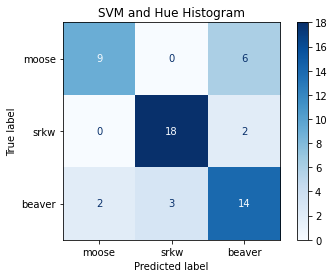

[[ 9  0  6]
 [ 0 18  2]
 [ 2  3 14]]


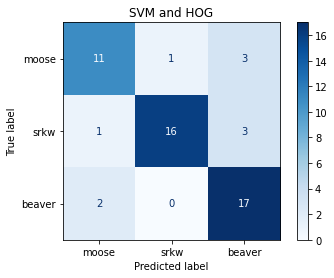

[[11  1  3]
 [ 1 16  3]
 [ 2  0 17]]


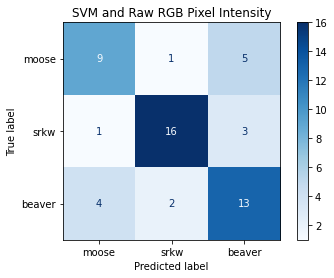

[[ 9  1  5]
 [ 1 16  3]
 [ 4  2 13]]


In [ ]:
# The activities described in this cell are worth a maximum of 3 points.
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# TO-DO: as a first analysis step, consider the SVM classifier models trained with
# the three feature types (HOG, HHist and Raw). Use sklearn's "plot_confusion_matrix" and 
# "confusion matrix" to show the confusion matrix (non-normalized) using these three SVM models.
# In other words, calculate and display three confusion matrices using the SVM classifier and the HOG, 
# HHist and raw TEST (not TRAIN) features/labels.
# An example of one such confusion matrix is provided: 
# https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A3/example_cm_svm_raw_feat.jpg

disp_svmHHist = plot_confusion_matrix(estimator=models['svm_HHist'], X=features['HHist_test'], y_true=test_labels, display_labels=classes_labels, cmap=plt.cm.Blues)
disp_svmHHist.ax_.set_title("SVM and Hue Histogram")
plt.show()
print(disp_svmHHist.confusion_matrix)

disp_svmHOG = plot_confusion_matrix(estimator=models['svm_HOG'], X=features['HOG_test'], y_true=test_labels, display_labels=classes_labels, cmap=plt.cm.Blues)
disp_svmHOG.ax_.set_title("SVM and HOG")
plt.show()
print(disp_svmHOG.confusion_matrix)

disp_svmRAW = plot_confusion_matrix(estimator=models['svm_raw'], X=features['raw_test'], y_true=test_labels, display_labels=classes_labels, cmap=plt.cm.Blues)
disp_svmRAW.ax_.set_title("SVM and Raw RGB Pixel Intensity")
plt.show()
print(disp_svmRAW.confusion_matrix)




  
# Note: in total, you are asked to present THREE confusion matrices. Each of them will reflect 54 predictions (number of 
# samples in the TEST set).

In [ ]:
# The activities described in this cell are worth a maximum of 10 points.

# TO-DO: create a function called "my_evaluation" to systematically calculate 
# a model's confusion matrix and a number of evaluation metrics based on it. Follow
# the template provided below.  
from sklearn.metrics import recall_score, precision_score, accuracy_score
def my_evaluation(features, labels, model):

    # This function receives as inputs the TEST SET features, TEST SET labels and 
    # the model (trained on the TRAIN SET) to be evaluated. 
  
    # Note: you CANNOT use "sklearn.metrics" methods in this function. The goal is that you
    # calculate them manually from a confusion matrix.

    # TO-DO: create a dictionary called "results" to hold six metrics.
    # The keys of such dictionary should be "accuracy", "recall",
    # "precision", "avg_recall", "avg_precision" and "fscore".
    # The initial values of such key/value pair should be set to zero. 

    results = {}# TO-DO

    # TO-DO: use the features and model provided as input parameters to make the
    # classification predictions.
    pred = model.predict(features)# TO-DO
    #print(pred)
    #print(len(labels))
    # TO-DO: create a confusion matrix based on the "labels" and "pred".
    # hint: you may use sklearn.metrics.confusion_matrix to create this matrix.
    # note: if using sklearn, note that it creates a confusion matrix where the
    # y-axis represents the LABELS, while the x-axis represents
    # the PREDICTIONS (conversely to what we did in class).
    # e.g.,
    # Consider labels = [2, 0, 2, 2, 0, 1], pred = [0, 0, 2, 2, 0, 2].
    # The confusion matrix (CM) would be: array([[2, 0, 0], [0, 0, 1], [1, 0, 2]])
    # And the normalized CM would be: [[1, 0, 0], [0, 0, 1], [0.33, 0, 0.66]]

    cm_raw = confusion_matrix(y_true=labels, y_pred=pred, labels=[0,1,2]) # TO-DO # calculate the raw (non-normalized) CM
    print("The confusion matrix is: \n {}\n".format(cm_raw))

    # TO-DO: calculate the number of True Positives, False Negatives, 
    # and False Positives based on your confusion matrix (refer to the
    # slides for Lecture 12). 
    # tip: consider these metrics as class-specific. Thus for N classes, each metric
    # will be a row vector of dimensions 1,N. The "average" metrics will consider 
    # all classes at once. 
    
    #The order is mose, beaver, srkw
    TP = np.diag(cm_raw) # TO-DO
    print("The true positives (i.e. instances where the correct classifications were made) for classes 0, 1, and 2 are: \n{}".format(TP))
    #instances where the actual class was not '__' but the model thought it was
    FP = [np.sum(cm_raw[1:3, 0]), cm_raw[0,1] + cm_raw[2,1], np.sum(cm_raw[0:2, 2])]# TO-DO
    print("The false positives (i.e. instances where the actual class was not '__' but the model thought it was) for classes 0, 1, and 2 are: \n{}".format(FP))
    #instances where the actual class was '__' but the model thought it was something else
    FN =  [np.sum(cm_raw[0,1:]), (cm_raw[1,0] + cm_raw[1,2]), np.sum(cm_raw[2,:2])]
    print("The false negatives (i.e. instances where the actual class was '__' but the model thought it was something else) for classes 0, 1, and 2 are: \n{}".format(FN))# TO-DO

    # TO-DO: calculate the class-specific and average recall. insert
    # each value in its corresponding key on the dictionary previously created
    # tip: consider scenarios where a division by zero (i.e., NaN results)
    # can happen. You might want to add very small values on denominators to
    # avoid that.
    recall = np.divide(TP,(TP+FN))
    avg_recall = recall.mean()
    print("\nThe manually calculated average recall is: {}".format(recall.mean()))
    print("The sknlearn.metrics average recall is: {}".format(recall_score(labels, pred, average='macro')))
    # update the values of keys "recall" and "avg_recall" from the "results" dictionary
    results['recall'] = recall
    results['avg_recall'] = avg_recall

    # TO-DO: calculate the class-specific and average precisions. insert
    # each value in its corresponding key on the dictionary previously created.
    # tip: consider scenarios where a division by zero (i.e., NaN results)
    # can happen. You might want to add very small values on denominators to
    # avoid that.
    precision = np.divide(TP, (TP+FP))
    avg_precision = precision.mean()
    print("\nThe manually calculated average precision is: {}".format(avg_precision))
    print("The sklearn.metrics average precision is: {}".format(precision_score(labels, pred, average='macro')))
    # update the values of keys "precision" and "avg_precision" from the "results" dictionary
    results['precision'] = precision
    results['avg_precision'] = avg_precision
  
    # TO-DO: calculate the F1-Score and add it to its corresponding key in your
    # "results" dictionary
    fscore = 2*(avg_precision*avg_recall)/(avg_precision+avg_recall)
    print("\nThe F1-score is: {}".format(fscore))
    results['fscore']=fscore

    # TO-DO: calculate the accuracy and add it to its corresponding key in your
    # "results" dictionary. 
    # Note: even without the TN element you can calculate the accuracy. Simply 
    # check the mean of "pred==labels"    
    results["accuracy"] = np.mean(pred == labels)
    print('\nThe manually calculated accuracy is: {}'.format(results["accuracy"]))
    print("The sklearn.metrics accuracy is: {}".format(accuracy_score(labels, pred, normalize=True)))

    # provided checks to make sure that the manually calculated metrics are correct.
    check1 = np.isclose(results['avg_recall'], recall_score(labels, pred, average='macro'))
    check2 = np.isclose(results['avg_precision'], precision_score(labels, pred, average='macro'))
    check3 = np.isclose(results['accuracy'], accuracy_score(labels, pred, normalize=True))

    assert (check1 and check2 and check3), 'accuracy, precision or recall are not correct.'

    # TO-DO: return your evaluation metrics 
    return results['avg_recall'], results['avg_precision'], results['fscore']

#my_evaluation(features['raw_test'], test_labels, models['lreg_raw'])
#my_evaluation(features['raw_test'], test_labels, models['nb_raw'])
#my_evaluation(features['raw_test'], test_labels, models['svm_raw'])

#my_evaluation(features['HOG_test'], test_labels, models['lreg_HOG'])
#my_evaluation(features['HOG_test'], test_labels, models['nb_HOG'])
#my_evaluation(features['HOG_test'], test_labels, models['svm_HOG'])

#my_evaluation(features['HHist_test'], test_labels, models['lreg_HHist'])
#my_evaluation(features['HHist_test'], test_labels, models['nb_HHist'])
#my_evaluation(features['HHist_test'], test_labels, models['svm_HHist'])



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Using model "svm_HOG" with data set "HOG_test"
The following data will be stored in the results dictionary under 'svm_HOG_eval'

The confusion matrix is: 
 [[11  1  3]
 [ 1 16  3]
 [ 2  0 17]]

The true positives (i.e. instances where the correct classifications were made) for classes 0, 1, and 2 are: 
[11 16 17]
The false positives (i.e. instances where the actual class was not '__' but the model thought it was) for classes 0, 1, and 2 are: 
[3, 1, 6]
The false negatives (i.e. instances where the actual class was '__' but the model thought it was something else) for classes 0, 1, and 2 are: 
[4, 4, 2]

The manually calculated average recall is: 0.8093567251461988
The sknlearn.metrics average recall is: 0.8093567251461988

The manually calculated average precision is: 0.82200706369504

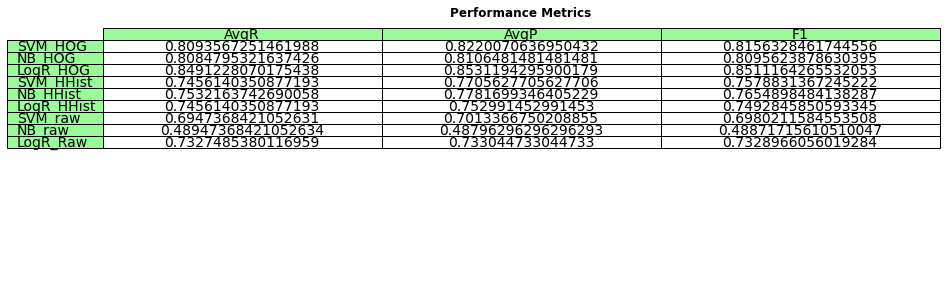

In [ ]:
# The activities described in this cell are worth a maximum of 7 points.

# TO-DO: create a dictionary called "results" and save, on each 
# key/value pair, the results of the evaluation from each of the 
# nine models trained. To focus our analisys, you only need to 
# record the average precision, average recall and F1-score in this dictionary. 
# Use loops to fill in the dictionary using a maximum of NINE iterations.

data = np.zeros((9,3)) # only three metrics and nine possible models 
results = {}
idx = 0

# TO-DO: loop throughout each model and feature type (total of nine iterations). 
# For each model/feature index,
# 1) Use your "my_evaluation" function to calculate the performance metrics. Save the 
# result on the "results" dictionary with the following key name template: "results[m+"_"+f+"_eval"]"
# where "m" is the name of the model, and "f" is the type of the feature.   
# e.g., For SVM using HOG, the performance metrics would be saved on "results[svm_HOG_eval]".
# 2) fill data[idx,0], data[idx,1] and data[idx,2] with the values of "avg_recall", "avg_precision" and 
# "fscore" for this model/features pair.   


model_type = ["svm", "nb", "lreg"]#TO-DO (list with three strings specifying the possible model names)
feature_type = ["HOG","HHist","raw"] #TO-DO (list with three strings specifying the possible feature types)

for i in range(len(model_type)):
  feature = features[feature_type[i]+"_test"]
  for j in range(len(feature_type)):
    model_name = model_type[j] + "_" + feature_type[i]
    print('\n')
    print('-'*100)
    print('-'*100)
    print('\nUsing model "{}" with data set "{}"'.format(model_name,feature_type[i]+"_test"))
    print("The following data will be stored in the results dictionary under '{}'\n".format(model_name+"_eval"))
    results[model_name+"_eval"] = my_evaluation(features[feature_type[i]+"_test"], test_labels, models[model_name])
    data[idx,0] = results[model_name+"_eval"][0]
    data[idx,1] = results[model_name+"_eval"][1]
    data[idx,2] = results[model_name+"_eval"][2]
    idx += 1
    print(idx)

#for i in range(len(mode_type)*len(feature_type)):
#  data[idx,0] = results[]
#print(results['svm_HOG_eval'][1])
print(data)

# TO-DO: show the average precision, average recall and F1-score metrics of each 
# of the nine model/feature pairs in a single table. 
# The row and column labels are provided below. 
# Tip: you can use plt.table
# as a reference, your table should look [like this](https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A3/example_matrix.jpg):
fig, ax = plt.subplots(figsize=(15,5))
#fig.set_figheight(30)
#fig.set_figwidth(15)
ax.set_axis_off()
#got some help from here https://www.pythonpool.com/matplotlib-table/
row_labels = ['SVM_HOG','NB_HOG','LogR_HOG','SVM_HHist','NB_HHist','LogR_HHist','SVM_raw','NB_raw','LogR_Raw']
col_labels = ["AvgR", "AvgP", "F1"]
table = ax.table(data, rowLabels=row_labels, colLabels=col_labels, rowColours =["palegreen"] * 10, colColours =["palegreen"] * 10, cellLoc='center' , loc='upper center')
ax.set_title('Performance Metrics', fontweight ="bold") 
table.set_fontsize(14)
plt.show()

### **2.5 Increasing the classification performance**

There exists a number of design choices to make when curating a dataset and training a model. These include, but are not limited to: 

- Size of the input images (if the data is resized)
- Data standardization: turn the data (either raw of feature-like) into a zero-mean, unit variance set
- Data augmentation: modify the input data to train the models using more generic and representative data
- Solvers: supervised machine learning algorithms use specific techniques to carry out their optimization problems. Changing these techniques influences in the models' performance.   

The "sklearn" library provides functions to easily implement these pre-processing and training mechanisms. Note that different combinations of them might **improve or decrease** the performance of the models  

You are asked to test different layouts and use the evaluation pipeline created up until sub-section 2.4 to analyze each of them. **Your goal is to reach a layout that surpasses 0.84 of F1-score using any combination of the aforementioned modifications in the training/testing phases**. 

Note: You cannot use other classification models (e.g., Convolutional Neural Networks-based image classifiers). 

----------------------------------------------------------------------------------------------------
The content of the 'folders' array, is as follows: ['./data/train/moose', './data/train/srkw', './data/train/beaver']

The content of the 'subfolderNames' array, is as follows: ['./data/train/', 'moose', 'srkw', 'beaver']

Thus, the number of classes are: 3
----------------------------------------------------------------------------------------------------

The files contained within the "./data/train/moose" dataset of class "moose" are as follows:

24.jpg
23.jpg
25.jpg
19.jpg
65.jpg
52.jpg
41.jpg
62.jpg
34.jpg
33.jpg
57.jpg
15.jpg
46.jpg
64.jpg
27.jpg
29.jpg
61.jpg
20.jpg
13.jpg
18.jpg
31.jpg
60.jpg
36.jpg
14.jpg
50.jpg
58.jpg
47.jpg
16.jpg
55.jpg
8.jpg
59.jpg
12.jpg
11.jpg
4.jpg
54.jpg
44.jpg
37.jpg
19cli-moose-videoSixteenByNineJumbo1600-v2.jpg
1.jpg
28.jpg
42.jpg
22.jpg
21.jpg
26.jpg
40.jpg
7.jpg
56.jpg
43.jpg
10.jpg
38.jpg
45.jpg
32.jpg
17.jpg
9.jpg
0.jpg
2.jpg
48.jpg
63.jpg
49.jpg

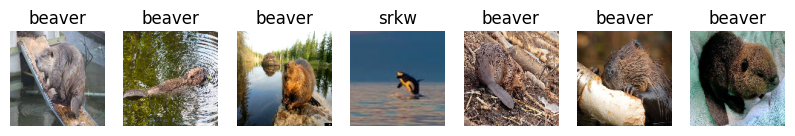


Shuffling test data


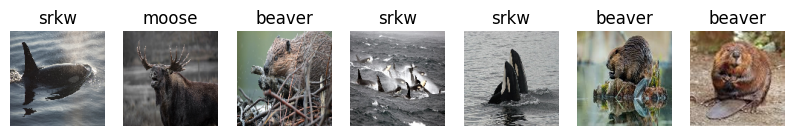

The shape of the shuffled Train data is: (254, 128, 128, 3)

The shape of the shuffled Test data is: (54, 128, 128, 3)

Extracting HOG features from the test dataset...
(54, 15876)
Extracting HOG features from the train dataset...
(254, 15876)
The shape of the dictionary entry for 'HOG_test_1' is: (54, 15876)
The shape of the dictionary entry for 'HOG_train_1' is: (254, 15876)
Extracting h histogram features from the test dataset...
(54, 16)
Extracting h histogram features from the train dataset...
(254, 16)
The shape of the 'raw_train' visual features is: (254, 49152)
The shape of the 'raw_test' visual features is: (54, 49152)

The intensity values in the 'raw_train' feature set have been cast as type: <class 'numpy.float64'>
The intensity values in the 'raw_test' feature set have been cast as type: <class 'numpy.float64'>
Training the 'svm_HOG' model now using 'svm' and the 'HOG_train' dataset
Creating a Support Vector Machine Model...
Finished training the model.

Training the 'nb_H

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Finished training the model.

Training the 'svm_HHist' model now using 'svm' and the 'HHist_train' dataset
Creating a Support Vector Machine Model...
Finished training the model.

Training the 'nb_HHist' model now using 'nb' and the 'HHist_train' dataset
Creating a Gaussian Naive Bayes Model...
Finished training the model.

Training the 'lreg_HHist' model now using 'lreg' and the 'HHist_train' dataset
Creating a Logistic Regression Model...
Finished training the model.

Training the 'svm_raw' model now using 'svm' and the 'raw_train' dataset
Creating a Support Vector Machine Model...
Finished training the model.

Training the 'nb_raw' model now using 'nb' and the 'raw_train' dataset
Creating a Gaussian Naive Bayes Model...
Finished training the model.

Training the 'lreg_raw' model now using 'lreg' and the 'raw_train' dataset
Creating a Logistic Regression Model...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Finished training the model.



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Using model "svm_HOG" with data set "HOG_test"
The following data will be stored in the results dictionary under 'svm_HOG_eval'

The confusion matrix is: 
 [[13  0  2]
 [ 2 17  1]
 [ 1  0 18]]

The true positives (i.e. instances where the correct classifications were made) for classes 0, 1, and 2 are: 
[13 17 18]
The false positives (i.e. instances where the actual class was not '__' but the model thought it was) for classes 0, 1, and 2 are: 
[3, 0, 3]
The false negatives (i.e. instances where the actual class was '__' but the model thought it was something else) for classes 0, 1, and 2 are: 
[2, 3, 1]

The manually calculated average recall is: 0.8880116959064327
The sknlearn.metrics average recall is: 0.8880116959064327

The manually calculated average 

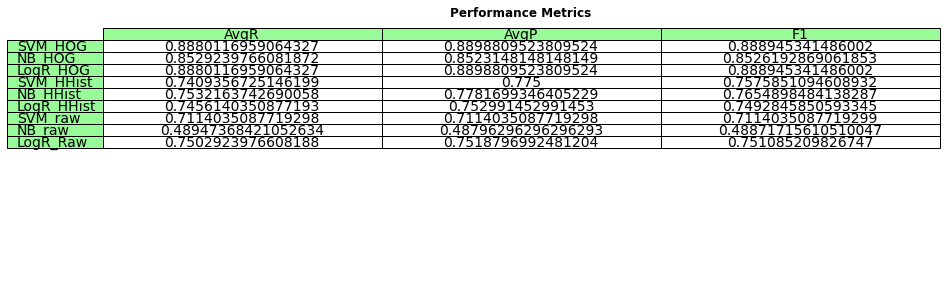

In [ ]:
# The activities described in this cell are worth a maximum of 10 points.

####Pre-Processing####
#grab the train and test data and resize using dimension 128x128
train_data_1, train_labels_1, classes_labels_1 = read_data(train_folders, resize_dim=(128,128))# TO-DO
test_data_1, test_labels_1, classes_labels_test_1 = read_data(test_folders, resize_dim=(128,128))# TO-DO 
assert classes_labels_1==classes_labels_test_1, 'Your train/test folder names do not match'
print('-'*100)
print('-'*100)
print('-'*100)
print("The shape of the 'train_data' ndarray is: {}\n".format(train_data_1.shape))
print("The shape of the 'test_data' ndarray is: {}".format(test_data_1.shape))
print('-'*100)
print('-'*100)
print('-'*100)
#randomize and display all of the resized train/test data
train_data_1, train_labels_1 = randomize_and_display(train_data_1, train_labels_1, classes_labels_1, display_n=7, phase='train') # TO-DO # use randomize_and_display on the train data
plt.show()
test_data_1, test_labels_1 = randomize_and_display(test_data_1, test_labels_1, classes_labels_test_1, display_n=7, phase='test')# TO-DO # use randomize_and_display on the test data
plt.show()
print('The shape of the shuffled Train data is: {}\n'.format(train_data_1.shape))
print('The shape of the shuffled Test data is: {}\n'.format(test_data_1.shape))

####Feature Extraction####
## -------- HOG -------- ##
#use the "my_hog_batch" function to extract the HOG features from both the resized train and test datasets
HOG_test_1 = my_hog_batch(test_data_1, phase='test')
HOG_train_1 = my_hog_batch(train_data_1, phase='train')
# Save your HOG train and test features in a dictionary named
# "features_1" under keys "HOG_train_1" and "HOG_test_1".
features_1 = {}
features_1['HOG_test'] = HOG_test_1
features_1['HOG_train'] = HOG_train_1
print("The shape of the dictionary entry for 'HOG_test_1' is: {}".format(features_1.get('HOG_test').shape))
print("The shape of the dictionary entry for 'HOG_train_1' is: {}".format(features_1.get('HOG_train').shape))
## --- Hue Histogram --- ##
hue_Hist_test_1 = my_hhist_batch(test_data_1, n_bins, phase='test')
hue_Hist_train_1 = my_hhist_batch(train_data_1, n_bins, phase='train')
#TO-DO: create the "HHist_train" and "HHist_test" keys and add the output of your 
# "my_hhist_batch" function to them. 
features_1['HHist_test'] = hue_Hist_test_1
features_1['HHist_train'] = hue_Hist_train_1
## - Raw RGB Intensity - ##
#flatten the pixel intensity values to use raw rgb data as a feature
raw_train_1 = train_data_1.flatten().reshape(train_data_1.shape[0], train_data_1.shape[1]*train_data_1.shape[2]*train_data_1.shape[3])
raw_test_1 = test_data_1.flatten().reshape(test_data_1.shape[0], test_data_1.shape[1]*test_data_1.shape[2]*test_data_1.shape[3])
#cast the intensity values as floats for further manipulations and then place into the features dictionary
features_1['raw_train'] = raw_train_1.astype(float)
features_1['raw_test'] = raw_test_1.astype(float)
print("The shape of the 'raw_train' visual features is: {}".format(raw_train_1.shape))
print("The shape of the 'raw_test' visual features is: {}".format(raw_test_1.shape))
print("\nThe intensity values in the 'raw_train' feature set have been cast as type: {}".format(type(features_1['raw_train'][0,0])))
print("The intensity values in the 'raw_test' feature set have been cast as type: {}".format(type(features_1['raw_test'][0,0])))

####Model Training####
#train each of the 3 (naive-bayes, logistic regression, and support vector machines) for each of the 3 feature sets (hog, hue histogram, raw rgb intensity)
#this will total 9 trained models that will be tested with the respective test datasets
models_1 = {}
model_type = ["svm", "nb", "lreg"]#TO-DO (list with three strings specifying the possible model names)
feature_type = ["HOG","HHist","raw"] #TO-DO (list with three strings specifying the possible feature types)
# TO-DO: a loop (of a maximum of nine iterations) that creates nine models and place each of 
# them in a key/value pair of the "models" dictionary.
#iterations = (len(model_type)*len(feature_type))
for i in range(len(model_type)):
  feature = features_1[feature_type[i]+"_train"]
  #print(feature_type[i]+"_train")
  for j in range(len(feature_type)):
    model_name = model_type[j] + "_" + feature_type[i]
    print("Training the '{}' model now using '{}' and the '{}' dataset".format(model_name,model_type[j],feature_type[i]+"_train"))
    #print(model_type[j])
    #print(feature_type[i]+"_train")
    models_1[model_name] = my_model_trainer(feature, train_labels_1, model_type[j])
    
####Classifier Evaluation####    
data_1 = np.zeros((9,3)) # only three metrics and nine possible models 
results_1 = {}
idx_1 = 0
model_type = ["svm", "nb", "lreg"]#TO-DO (list with three strings specifying the possible model names)
feature_type = ["HOG","HHist","raw"] #TO-DO (list with three strings specifying the possible feature types)
for i in range(len(model_type)):
  feature = features_1[feature_type[i]+"_test"]
  for j in range(len(feature_type)):
    model_name = model_type[j] + "_" + feature_type[i]
    print('\n')
    print('-'*100)
    print('-'*100)
    print('\nUsing model "{}" with data set "{}"'.format(model_name,feature_type[i]+"_test"))
    print("The following data will be stored in the results dictionary under '{}'\n".format(model_name+"_eval"))
    results_1[model_name+"_eval"] = my_evaluation(features_1[feature_type[i]+"_test"], test_labels_1, models_1[model_name])
    data_1[idx_1,0] = results_1[model_name+"_eval"][0]
    data_1[idx_1,1] = results_1[model_name+"_eval"][1]
    data_1[idx_1,2] = results_1[model_name+"_eval"][2]
    idx_1 += 1
    print(idx_1)
print(data_1)

# TO-DO: show the average precision, average recall and F1-score metrics of each 
# of the nine model/feature pairs in a single table. 
# The row and column labels are provided below. 
# Tip: you can use plt.table
# as a reference, your table should look [like this](https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A3/example_matrix.jpg):
fig, ax = plt.subplots(figsize=(15,5))
#fig.set_figheight(30)
#fig.set_figwidth(15)
ax.set_axis_off()
#got some help from here https://www.pythonpool.com/matplotlib-table/
table = ax.table(data_1, rowLabels=row_labels, colLabels=col_labels, rowColours =["palegreen"] * 10, colColours =["palegreen"] * 10, cellLoc='center' , loc='upper center')
ax.set_title('Performance Metrics', fontweight ="bold") 
table.set_fontsize(14)
plt.show()
row_labels = ['SVM_HOG','NB_HOG','LogR_HOG','SVM_HHist','NB_HHist','LogR_HHist','SVM_raw','NB_raw','LogR_Raw']
col_labels = ["AvgR", "AvgP", "F1"]



### **2.6 Custom dataset**

Time to create and use your own dataset! Download images and divide them into train/test subfolders following the sample data provided. You can also use a subset of a pre-existing dataset. 

Requirements are: 
- 3+ classes
- 70+ training images per class (.jpg files)
- 10+ testing images per class (.jpg files)
- Up to 50MB for the .zip file of your dataset  

Calculate the three types of features (i.e., HOG, HHist and raw) and train the three types of models (SVM, Logistic Regression and Gaussian Naive Bayes) using the function you created. 

Evaluate your models on your custom dataset using the "my_evaluation" function and create a table such as the one in sub-section 2.4 (i.e., presenting the average precision, average recall and F1-score for each of the nine custom-trained models). 

Note: zip your dataset in a file called "my_data.zip" and add it to your submission package on BrightSpace so that we can reproduce your experimental setting. 


 It looks like "data.zip" has been uploaded but not extacted yet. Extracting now...

Archive:  my_data.zip
   creating: my_data/
   creating: my_data/test/
   creating: my_data/test/motorcycle/
  inflating: my_data/test/motorcycle/moto0.jpg  
  inflating: my_data/test/motorcycle/moto1.jpg  
 extracting: my_data/test/motorcycle/moto10.jpg  
  inflating: my_data/test/motorcycle/moto11.jpg  
  inflating: my_data/test/motorcycle/moto12.jpg  
  inflating: my_data/test/motorcycle/moto13.jpg  
  inflating: my_data/test/motorcycle/moto14.jpg  
  inflating: my_data/test/motorcycle/moto15.jpg  
  inflating: my_data/test/motorcycle/moto16.jpg  
  inflating: my_data/test/motorcycle/moto2.jpg  
  inflating: my_data/test/motorcycle/moto3.jpg  
  inflating: my_data/test/motorcycle/moto4.jpg  
  inflating: my_data/test/motorcycle/moto5.jpg  
  inflating: my_data/test/motorcycle/moto6.jpg  
  inflating: my_data/test/motorcycle/moto7.jpg  
  inflating: my_data/test/motorcycle/moto8.jpg  
  inflating: m

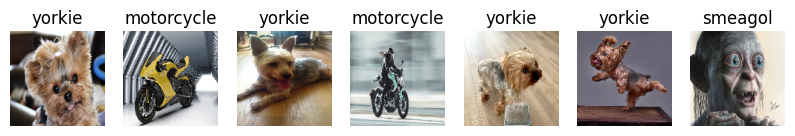


Shuffling test data


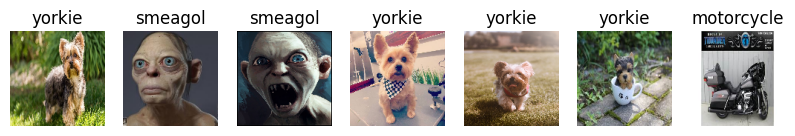

The shape of the shuffled Train data is: (227, 128, 128, 3)

The shape of the shuffled Test data is: (51, 128, 128, 3)

Extracting HOG features from the test dataset...
(51, 15876)
Extracting HOG features from the train dataset...
(227, 15876)
The shape of the dictionary entry for 'my_HOG_test' is: (51, 15876)
The shape of the dictionary entry for 'my_HOG_train' is: (227, 15876)
Extracting h histogram features from the test dataset...
(51, 16)
Extracting h histogram features from the train dataset...
(227, 16)
The shape of the 'my_raw_train' visual features is: (227, 49152)
The shape of the 'my_raw_test' visual features is: (51, 49152)

The intensity values in the 'my_raw_train' feature set have been cast as type: <class 'numpy.float64'>
The intensity values in the 'raw_test' feature set have been cast as type: <class 'numpy.float64'>
Training the 'svm_HOG' model now using 'svm' and the 'HOG_train' dataset
Creating a Support Vector Machine Model...
Finished training the model.

Trainin

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Finished training the model.

Training the 'svm_HHist' model now using 'svm' and the 'HHist_train' dataset
Creating a Support Vector Machine Model...
Finished training the model.

Training the 'nb_HHist' model now using 'nb' and the 'HHist_train' dataset
Creating a Gaussian Naive Bayes Model...
Finished training the model.

Training the 'lreg_HHist' model now using 'lreg' and the 'HHist_train' dataset
Creating a Logistic Regression Model...
Finished training the model.

Training the 'svm_raw' model now using 'svm' and the 'raw_train' dataset
Creating a Support Vector Machine Model...
Finished training the model.

Training the 'nb_raw' model now using 'nb' and the 'raw_train' dataset
Creating a Gaussian Naive Bayes Model...
Finished training the model.

Training the 'lreg_raw' model now using 'lreg' and the 'raw_train' dataset
Creating a Logistic Regression Model...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Finished training the model.



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Using model "svm_HOG" with data set "HOG_test"
The following data will be stored in the results dictionary under 'svm_HOG_eval'

The confusion matrix is: 
 [[13  4  0]
 [ 2 11  4]
 [ 0  6 11]]

The true positives (i.e. instances where the correct classifications were made) for classes 0, 1, and 2 are: 
[13 11 11]
The false positives (i.e. instances where the actual class was not '__' but the model thought it was) for classes 0, 1, and 2 are: 
[2, 10, 4]
The false negatives (i.e. instances where the actual class was '__' but the model thought it was something else) for classes 0, 1, and 2 are: 
[4, 6, 6]

The manually calculated average recall is: 0.6862745098039215
The sknlearn.metrics average recall is: 0.6862745098039215

The manually calculated average

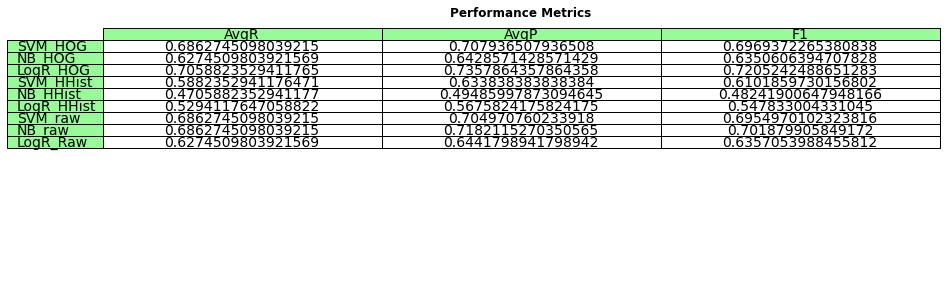

In [56]:
# The activities described in this cell are worth a maximum of 15 points.

# TO-DO: add the code for the reading, training of models and evaluation processes 
# using your custom dataset. 

####Pre-Processing####
# TO-DO: check if "./my_data/train" and "./my_data/test" exist. If not, ask user to upload 
# "my_data.zip" and then rerun this cell. This file will have the aforementioned sub-folders.

my_train_folders = "./my_data/train/"
my_test_folders = "./my_data/test/"
resize_dims = (128,128) # determines the target resizing dimensions.

if not (os.path.exists(my_train_folders) & os.path.exists(my_test_folders)):
  if (os.path.exists("./my_data.zip")):
    print('\n It looks like "data.zip" has been uploaded but not extacted yet. Extracting now...\n')
    !unzip my_data.zip
  else:
    raise Exception('There are no train and test data sets (or folders). Please upload "my_data.zip" and run this code cell again')

#grab the train and test data and resize using dimension 128x128
my_train_data, my_train_labels, my_classes_labels = read_data(my_train_folders, resize_dim=(128,128))# TO-DO
my_test_data, my_test_labels, my_classes_labels_test = read_data(my_test_folders, resize_dim=(128,128))# TO-DO 
assert my_classes_labels==my_classes_labels_test, 'Your train/test folder names do not match'
print('-'*100)
print('-'*100)
print('-'*100)
print("The shape of the 'my_train_data' ndarray is: {}\n".format(my_train_data.shape))
print("The shape of the 'my_test_data' ndarray is: {}".format(my_test_data.shape))
print('-'*100)
print('-'*100)
print('-'*100)
#randomize and display all of the resized train/test data
my_train_data, my_train_labels = randomize_and_display(my_train_data, my_train_labels, my_classes_labels, display_n=7, phase='train') # TO-DO # use randomize_and_display on the train data
plt.show()
my_test_data, my_test_labels = randomize_and_display(my_test_data, my_test_labels, my_classes_labels_test, display_n=7, phase='test')# TO-DO # use randomize_and_display on the test data
plt.show()
print('The shape of the shuffled Train data is: {}\n'.format(my_train_data.shape))
print('The shape of the shuffled Test data is: {}\n'.format(my_test_data.shape))

####Feature Extraction####
## -------- HOG -------- ##
#use the "my_hog_batch" function to extract the HOG features from both the resized train and test datasets
my_HOG_test = my_hog_batch(my_test_data, phase='test')
my_HOG_train = my_hog_batch(my_train_data, phase='train')
# Save your HOG train and test features in a dictionary named
# "features_1" under keys "HOG_train_1" and "HOG_test_1".
my_features = {}
my_features['HOG_test'] = my_HOG_test
my_features['HOG_train'] = my_HOG_train
print("The shape of the dictionary entry for 'my_HOG_test' is: {}".format(my_features.get('HOG_test').shape))
print("The shape of the dictionary entry for 'my_HOG_train' is: {}".format(my_features.get('HOG_train').shape))
## --- Hue Histogram --- ##
my_hue_Hist_test = my_hhist_batch(my_test_data, n_bins, phase='test')
my_hue_Hist_train = my_hhist_batch(my_train_data, n_bins, phase='train')
#TO-DO: create the "HHist_train" and "HHist_test" keys and add the output of your 
# "my_hhist_batch" function to them. 
my_features['HHist_test'] = my_hue_Hist_test
my_features['HHist_train'] = my_hue_Hist_train
## - Raw RGB Intensity - ##
#flatten the pixel intensity values to use raw rgb data as a feature
my_raw_train = my_train_data.flatten().reshape(my_train_data.shape[0], my_train_data.shape[1]*my_train_data.shape[2]*my_train_data.shape[3])
my_raw_test = my_test_data.flatten().reshape(my_test_data.shape[0], my_test_data.shape[1]*my_test_data.shape[2]*my_test_data.shape[3])
#cast the intensity values as floats for further manipulations and then place into the features dictionary
my_features['raw_train'] = my_raw_train.astype(float)
my_features['raw_test'] = my_raw_test.astype(float)
print("The shape of the 'my_raw_train' visual features is: {}".format(my_raw_train.shape))
print("The shape of the 'my_raw_test' visual features is: {}".format(my_raw_test.shape))
print("\nThe intensity values in the 'my_raw_train' feature set have been cast as type: {}".format(type(my_features['raw_train'][0,0])))
print("The intensity values in the 'raw_test' feature set have been cast as type: {}".format(type(my_features['raw_test'][0,0])))

####Model Training####
#train each of the 3 (naive-bayes, logistic regression, and support vector machines) for each of the 3 feature sets (hog, hue histogram, raw rgb intensity)
#this will total 9 trained models that will be tested with the respective test datasets
my_models = {}
model_type = ["svm", "nb", "lreg"]#TO-DO (list with three strings specifying the possible model names)
feature_type = ["HOG","HHist","raw"] #TO-DO (list with three strings specifying the possible feature types)
# TO-DO: a loop (of a maximum of nine iterations) that creates nine models and place each of 
# them in a key/value pair of the "models" dictionary.
#iterations = (len(model_type)*len(feature_type))
for i in range(len(model_type)):
  feature = my_features[feature_type[i]+"_train"]
  #print(feature_type[i]+"_train")
  for j in range(len(feature_type)):
    model_name = model_type[j] + "_" + feature_type[i]
    print("Training the '{}' model now using '{}' and the '{}' dataset".format(model_name,model_type[j],feature_type[i]+"_train"))
    #print(model_type[j])
    #print(feature_type[i]+"_train")
    my_models[model_name] = my_model_trainer(feature, my_train_labels, model_type[j])
    
####Classifier Evaluation####    
my_data = np.zeros((9,3)) # only three metrics and nine possible models 
my_results = {}
my_idx = 0
model_type = ["svm", "nb", "lreg"]#TO-DO (list with three strings specifying the possible model names)
feature_type = ["HOG","HHist","raw"] #TO-DO (list with three strings specifying the possible feature types)
for i in range(len(model_type)):
  feature = my_features[feature_type[i]+"_test"]
  for j in range(len(feature_type)):
    model_name = model_type[j] + "_" + feature_type[i]
    print('\n')
    print('-'*100)
    print('-'*100)
    print('\nUsing model "{}" with data set "{}"'.format(model_name,feature_type[i]+"_test"))
    print("The following data will be stored in the results dictionary under '{}'\n".format(model_name+"_eval"))
    my_results[model_name+"_eval"] = my_evaluation(my_features[feature_type[i]+"_test"], my_test_labels, my_models[model_name])
    my_data[my_idx,0] = my_results[model_name+"_eval"][0]
    my_data[my_idx,1] = my_results[model_name+"_eval"][1]
    my_data[my_idx,2] = my_results[model_name+"_eval"][2]
    my_idx += 1
    print(my_idx)
print(my_data)

# TO-DO: show the average precision, average recall and F1-score metrics of each 
# of the nine model/feature pairs in a single table. 
# The row and column labels are provided below. 
# Tip: you can use plt.table
# as a reference, your table should look [like this](https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A3/example_matrix.jpg):
fig, ax = plt.subplots(figsize=(15,5))
#fig.set_figheight(30)
#fig.set_figwidth(15)
ax.set_axis_off()
#got some help from here https://www.pythonpool.com/matplotlib-table/
table = ax.table(my_data, rowLabels=row_labels, colLabels=col_labels, rowColours =["palegreen"] * 10, colColours =["palegreen"] * 10, cellLoc='center' , loc='upper center')
ax.set_title('Performance Metrics', fontweight ="bold") 
table.set_fontsize(14)
plt.show()
row_labels = ['SVM_HOG','NB_HOG','LogR_HOG','SVM_HHist','NB_HHist','LogR_HHist','SVM_raw','NB_raw','LogR_Raw']
col_labels = ["AvgR", "AvgP", "F1"]


**End of the assignment!**